<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/Racecar_Lab_SQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SQC_racecar_17inch.csv to SQC_racecar_17inch.csv
User uploaded file "SQC_racecar_17inch.csv" with length 456 bytes


In [63]:
import pandas as pd

df = pd.read_csv('SQC_racecar_17inch.csv',sep = ',', na_values = ".")
df

,A,B,C,D,E,Distance
0,-1,-1,-1,1,1,76.50
1,1,-1,-1,-1,-1,61.00
2,-1,1,-1,-1,1,107.50
3,1,1,-1,1,-1,85.00
4,-1,-1,1,1,-1,98.00
5,1,-1,1,-1,1,158.00
6,-1,1,1,-1,-1,168.50
7,1,1,1,1,1,123.00
8,-1,-1,-1,1,1,63.00
9,1,-1,-1,-1,-1,58.50


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A         24 non-null     int64  
 1   B         24 non-null     int64  
 2   C         24 non-null     int64  
 3   D         24 non-null     int64  
 4   E         24 non-null     int64  
 5   Distance  24 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.2 KB


In [65]:
Xmain=df[['A', 'B', 'C', 'D', 'E']]
Xmain

,A,B,C,D,E
0,-1,-1,-1,1,1
1,1,-1,-1,-1,-1
2,-1,1,-1,-1,1
3,1,1,-1,1,-1
4,-1,-1,1,1,-1
5,1,-1,1,-1,1
6,-1,1,1,-1,-1
7,1,1,1,1,1
8,-1,-1,-1,1,1
9,1,-1,-1,-1,-1


In [66]:
x1x2x3x4x5=df['A'] * df['B'] *df['C'] * df['D'] * df['E']
x1x2x3x4x5

0    -1
1     1
2    -1
3     1
4    -1
5     1
6    -1
7     1
8    -1
9     1
10   -1
11    1
12   -1
13    1
14   -1
15    1
16   -1
17    1
18   -1
19    1
20   -1
21    1
22   -1
23    1
dtype: int64

In [67]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5'])
xxpd['x1x2x3x4x5']=x1x2x3x4x5
xxpd

,I,x1,x2,x3,x4,x5,x1x2,x1x3,x1x4,x1x5,...,x1x2x4,x1x2x5,x1x3x4,x1x3x5,x2x3x4,x2x3x5,x3x4x5,x1x2x3x4,x1x2x3x5,x1x2x3x4x5
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1


In [68]:
X=xxpd[['x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5', 'x1x2x3x4x5']]
Y=df[['Distance']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)

[[ 8.91666667]
 [ 0.33333333]
 [-2.16666667]
 [-7.33333333]
 [-1.16666667]
 [ 5.        ]
 [-1.08333333]
 [ 1.16666667]
 [-4.58333333]
 [-2.16666667]
 [-1.16666667]
 [ 3.66666667]
 [-6.16666667]
 [ 3.        ]
 [-0.83333333]
 [-1.83333333]
 [-4.33333333]
 [ 1.83333333]
 [ 3.33333333]
 [ 3.66666667]
 [ 7.33333333]
 [-8.        ]
 [ 1.91666667]
 [ 0.66666667]]


In [69]:
X=xxpd[['I', 'x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5', 'x1x2x3x4x5'
]]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.11e-13
Time:                        20:45:06   Log-Likelihood:                -68.604
No. Observations:                  24   AIC:                             153.2
Df Residuals:                      16   BIC:                             162.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             36.4097      0.352    103.563      0.0

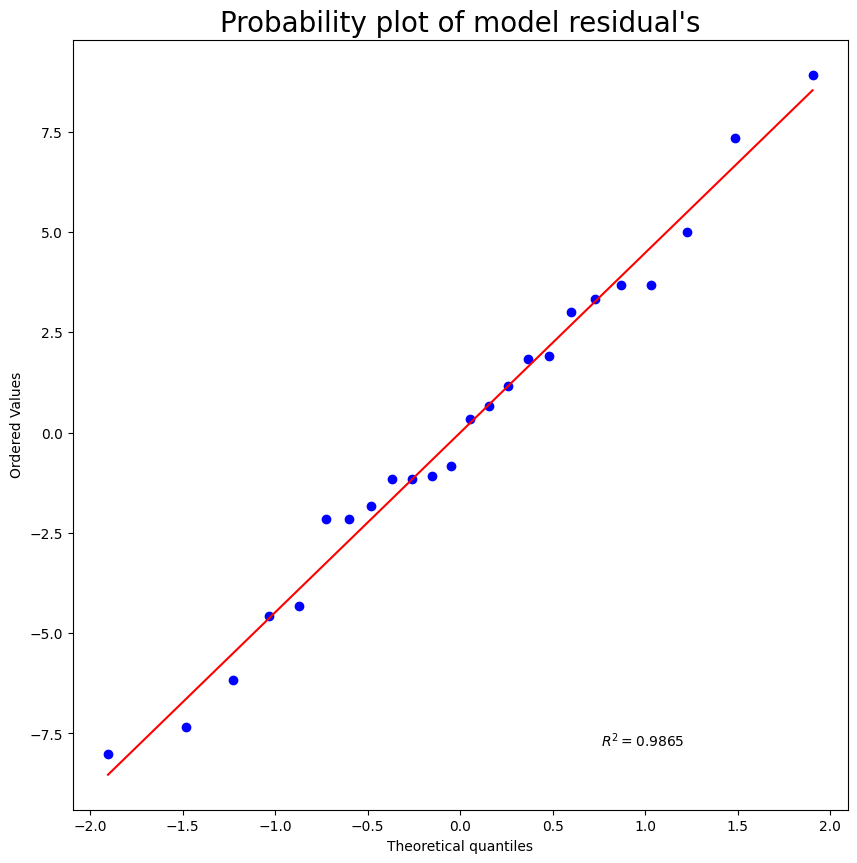

In [70]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

32INCH RAMP

In [82]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SQC_Racecar_32inch.csv to SQC_Racecar_32inch (1).csv
User uploaded file "SQC_Racecar_32inch (1).csv" with length 469 bytes


In [83]:
df = pd.read_csv('SQC_Racecar_32inch.csv',sep = ',', na_values = ".")
df

,A,B,C,D,E,Distance
0,-1.0,-1.0,-1.0,1.0,1.0,92.50
1,1.0,-1.0,-1.0,-1.0,-1.0,115.25
2,-1.0,1.0,-1.0,-1.0,1.0,176.00
3,1.0,1.0,-1.0,1.0,-1.0,114.00
4,-1.0,-1.0,1.0,1.0,-1.0,133.00
5,1.0,-1.0,1.0,-1.0,1.0,210.25
6,-1.0,1.0,1.0,-1.0,-1.0,271.00
7,1.0,1.0,1.0,1.0,1.0,187.00
8,-1.0,-1.0,-1.0,1.0,1.0,95.50
9,1.0,-1.0,-1.0,-1.0,-1.0,113.00


In [84]:
df = df.drop(24)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A         24 non-null     float64
 1   B         24 non-null     float64
 2   C         24 non-null     float64
 3   D         24 non-null     float64
 4   E         24 non-null     float64
 5   Distance  24 non-null     float64
dtypes: float64(6)
memory usage: 1.2 KB


In [86]:
Xmain=df[['A', 'B', 'C', 'D', 'E']]
Xmain

,A,B,C,D,E
0,-1.0,-1.0,-1.0,1.0,1.0
1,1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,1.0,-1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0,-1.0
4,-1.0,-1.0,1.0,1.0,-1.0
5,1.0,-1.0,1.0,-1.0,1.0
6,-1.0,1.0,1.0,-1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0
8,-1.0,-1.0,-1.0,1.0,1.0
9,1.0,-1.0,-1.0,-1.0,-1.0


In [87]:
x1x2x3x4x5=df['A'] * df['B'] *df['C'] * df['D'] * df['E']
x1x2x3x4x5

0    -1.0
1     1.0
2    -1.0
3     1.0
4    -1.0
5     1.0
6    -1.0
7     1.0
8    -1.0
9     1.0
10   -1.0
11    1.0
12   -1.0
13    1.0
14   -1.0
15    1.0
16   -1.0
17    1.0
18   -1.0
19    1.0
20   -1.0
21    1.0
22   -1.0
23    1.0
dtype: float64

In [88]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5'])
xxpd['x1x2x3x4x5']=x1x2x3x4x5
xxpd

,I,x1,x2,x3,x4,x5,x1x2,x1x3,x1x4,x1x5,...,x1x2x4,x1x2x5,x1x3x4,x1x3x5,x2x3x4,x2x3x5,x3x4x5,x1x2x3x4,x1x2x3x5,x1x2x3x4x5
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [89]:
X=xxpd[['x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5', 'x1x2x3x4x5']]
Y=df[['Distance']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)

[[-21.        ]
 [  2.16666667]
 [  0.33333333]
 [ 10.16666667]
 [ 17.        ]
 [  0.58333333]
 [  4.83333333]
 [  4.91666667]
 [-18.        ]
 [ -0.08333333]
 [ -0.66666667]
 [ -3.83333333]
 [-16.        ]
 [  0.08333333]
 [  1.33333333]
 [  6.91666667]
 [ 39.        ]
 [ -2.08333333]
 [  0.33333333]
 [ -6.33333333]
 [ -1.        ]
 [ -0.66666667]
 [ -6.16666667]
 [-11.83333333]]


In [90]:
X=xxpd[['I', 'x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5', 'x1x2x3x4x5'
]]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     50.08
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.06e-09
Time:                        21:14:16   Log-Likelihood:                -93.050
No. Observations:                  24   AIC:                             202.1
Df Residuals:                      16   BIC:                             211.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             53.3333      0.974     54.780      0.0

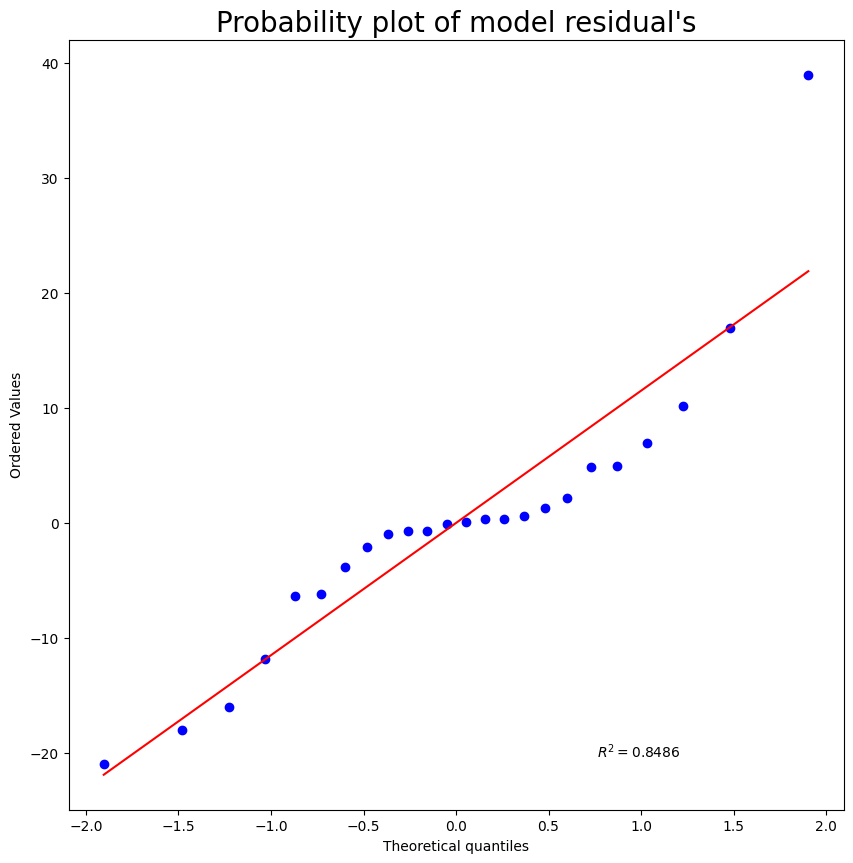

In [91]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

49 INCH RAMP

In [71]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SQC_racecar_49inch.csv to SQC_racecar_49inch.csv
User uploaded file "SQC_racecar_49inch.csv" with length 537 bytes


In [92]:
df = pd.read_csv('SQC_racecar_49inch.csv',sep = ',', na_values = ".")
df

,A,B,C,D,E,Distance,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,-1,-1,-1,1,1,166.50,NaN,NaN,NaN
1,1,-1,-1,-1,-1,155.50,NaN,NaN,NaN
2,-1,1,-1,-1,1,218.50,NaN,NaN,NaN
3,1,1,-1,1,-1,169.00,NaN,NaN,NaN
4,-1,-1,1,1,-1,131.00,NaN,NaN,NaN
5,1,-1,1,-1,1,311.00,NaN,NaN,NaN
6,-1,1,1,-1,-1,348.00,NaN,NaN,NaN
7,1,1,1,1,1,243.25,NaN,NaN,NaN
8,-1,-1,-1,1,1,177.75,NaN,NaN,NaN
9,1,-1,-1,-1,-1,152.00,NaN,NaN,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A           24 non-null     int64  
 1   B           24 non-null     int64  
 2   C           24 non-null     int64  
 3   D           24 non-null     int64  
 4   E           24 non-null     int64  
 5   Distance    24 non-null     float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(4), int64(5)
memory usage: 1.8 KB


In [95]:
Xmain=df[['A', 'B', 'C', 'D', 'E']]
Xmain

,A,B,C,D,E
0,-1,-1,-1,1,1
1,1,-1,-1,-1,-1
2,-1,1,-1,-1,1
3,1,1,-1,1,-1
4,-1,-1,1,1,-1
5,1,-1,1,-1,1
6,-1,1,1,-1,-1
7,1,1,1,1,1
8,-1,-1,-1,1,1
9,1,-1,-1,-1,-1


In [96]:
x1x2x3x4x5=df['A'] * df['B'] *df['C'] * df['D'] * df['E']
x1x2x3x4x5

0    -1
1     1
2    -1
3     1
4    -1
5     1
6    -1
7     1
8    -1
9     1
10   -1
11    1
12   -1
13    1
14   -1
15    1
16   -1
17    1
18   -1
19    1
20   -1
21    1
22   -1
23    1
dtype: int64

In [97]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5'])
xxpd['x1x2x3x4x5']=x1x2x3x4x5
xxpd

,I,x1,x2,x3,x4,x5,x1x2,x1x3,x1x4,x1x5,...,x1x2x4,x1x2x5,x1x3x4,x1x3x5,x2x3x4,x2x3x5,x3x4x5,x1x2x3x4,x1x2x3x5,x1x2x3x4x5
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,...,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1


In [102]:
X=xxpd[['x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5', 'x1x2x3x4x5']]
Y=df[['Distance']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)

[[ -5.25      ]
 [ -1.33333333]
 [ -6.        ]
 [ 13.        ]
 [  6.08333333]
 [ -3.        ]
 [  1.        ]
 [  1.5       ]
 [  6.        ]
 [ -4.83333333]
 [ 10.5       ]
 [ 12.        ]
 [  1.83333333]
 [  1.        ]
 [ -0.5       ]
 [ -2.75      ]
 [ -0.75      ]
 [  6.16666667]
 [ -4.5       ]
 [-25.        ]
 [ -7.91666667]
 [  2.        ]
 [ -0.5       ]
 [  1.25      ]]


In [99]:
X=xxpd[['I', 'x1', 'x2', 'x3', 'x4', 'x5','x1x2', 'x1x3', 'x1x4', 'x1x5', 'x2x3', 'x2x4', 'x2x5', 'x3x4', 'x3x5', 'x4x5', 'x1x2x3', 'x1x2x4', 'x1x2x5', 'x1x3x4', 'x1x3x5','x2x3x4', 'x2x3x5', 'x3x4x5', 'x1x2x3x4','x1x2x3x5', 'x1x2x3x4x5'
]]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     225.8
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           8.82e-15
Time:                        21:15:42   Log-Likelihood:                -82.516
No. Observations:                  24   AIC:                             181.0
Df Residuals:                      16   BIC:                             190.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             72.3646      0.628    115.284      0.0

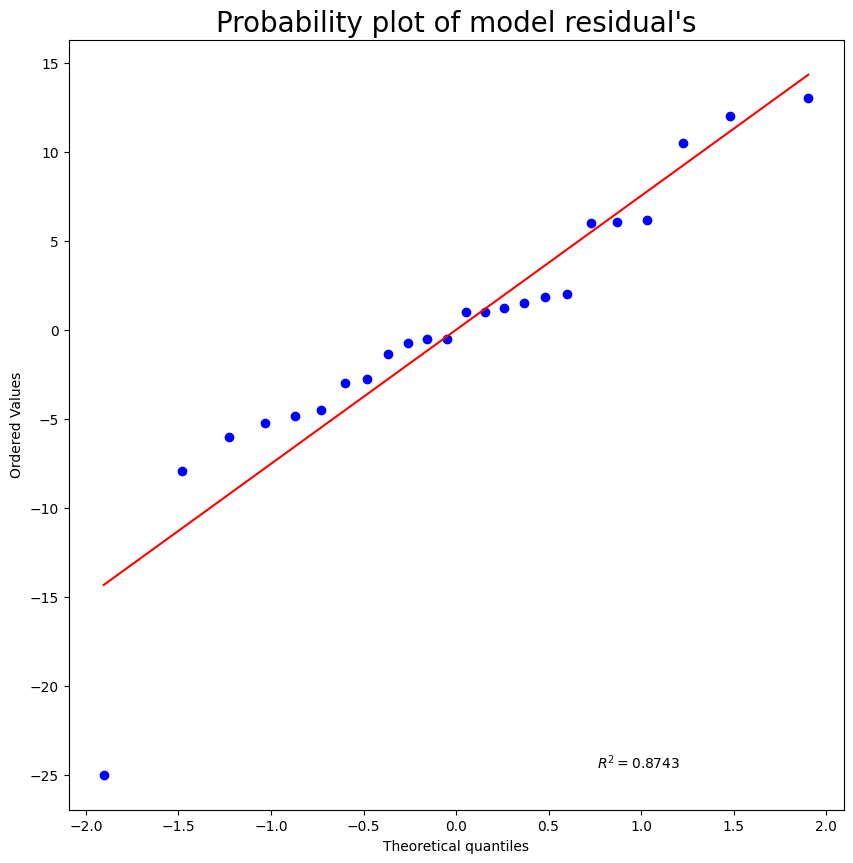

In [100]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()